# Campo electrico no ideal


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import scienceplots

import Boris as boris

#para leer los archivos necesitas instalar el paquete h5py, que lee archivos en formato hdf5 que es el formato de archivos que escribe el codigo de la simulacion.

name='C:/Users/lueiz/Desktop/Intro a la Investigación 2/flds.tot.00085'

f=h5py.File(name,'r') #llamamos al archivo en modo de lectura 'r'
bx=f.get('bx') #obtenemos el campo magnetico en x
bx=np.array(bx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bx=np.transpose(bx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

by=f.get('by') #obtenemos el campo magnetico en x
by=np.array(by)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
by=np.transpose(by) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

bz=f.get('bz') #obtenemos el campo magnetico en x
bz=np.array(bz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
bz=np.transpose(bz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ex=f.get('ex') #obtenemos el campo magnetico en x
ex=np.array(ex)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ex=np.transpose(ex) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ey=f.get('ey') #obtenemos el campo magnetico en x
ey=np.array(ey)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ey=np.transpose(ey) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

ez=f.get('ez') #obtenemos el campo magnetico en x
ez=np.array(ez)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
ez=np.transpose(ez) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

jx=f.get('jx') #obtenemos el campo magnetico en x
jx=np.array(jx)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
jx=np.transpose(jx) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

jy=f.get('jy') #obtenemos el campo magnetico en x
jy=np.array(jy)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
jy=np.transpose(jy) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

jz=f.get('jz') #obtenemos el campo magnetico en x
jz=np.array(jz)[0,:,:] #fijamos en 0 la primera componente del arreglo porque siempre son en 3 dimensiones, sin embargo la primera tiene solo un elemento
jz=np.transpose(jz) #trasponemos porque la forma en que escribe el codigo y lee python deja las matrices traspuestas

#para las demas componentes del campo magnetico tienes que usar get('by') o 'bz', si quieres el campo electrico están en 'ex', 'ey' y 'ez'

b=np.array((bx,by,bz))

e=np.array((ex,ey,ez))

j=np.array((jx,jy,jz))

Nx=np.size(b[0,:,0])

Ny=np.size(b[0,0,:])

print(np.shape(j))
# drift_vel= np.loadtxt('C:/Users/lueiz/Desktop/Intro a la Investigación 2/Introduccion-a-la-Investigacion-II/velocity_drift_00085.txt').reshape(b.shape)

#gamma1= np.loadtxt('/content/gamma1.txt')



(3, 5250, 1536)


In [2]:

# La posición de la current sheet es x=2570, y=720

J_cs=j[:,2570,720]

# Vectores normales de interes

n1=J_cs/np.linalg.norm(J_cs)

n2=np.cross(n1,np.array((0,0,1)))/np.linalg.norm(np.cross(n1,np.array((0,0,1))))

n3=np.cross(n1,n2)

# Ahora creamos las posiciones de las 18 particulas

r0 = np.zeros((3,6))

for i in range(0,6):
    r0[0,i]=2570
    r0[1,i]=720

print(r0)

# Ahora la velocidad de las particulas

v_i = np.zeros_like(r0)

v_i[:,0]=0.1*n1
v_i[:,1]=-0.1*n1

v_i[:,2]=0.1*n2
v_i[:,3]=-0.1*n2

v_i[:,4]=0.1*n3
v_i[:,5]=-0.1*n3

gamma0=np.ones(6)*1/np.sqrt(1-0.1**2)

# Pasos temporales

c=0.45

istep=8

factor=1

dx=1
dt=1*c/istep

NT=30

print(gamma0)

x=np.arange(0,Nx,int(dx))
y=np.arange(0,Ny,int(dx))


[[2570. 2570. 2570. 2570. 2570. 2570.]
 [ 720.  720.  720.  720.  720.  720.]
 [   0.    0.    0.    0.    0.    0.]]
[1.00503782 1.00503782 1.00503782 1.00503782 1.00503782 1.00503782]


In [3]:
r_plot,v,gamma,P=boris.varias_particulas_potencia(x,y,v_i,gamma0,r0,ex,ey,ez,bx,by,bz,NT,Nx,Ny,dt)

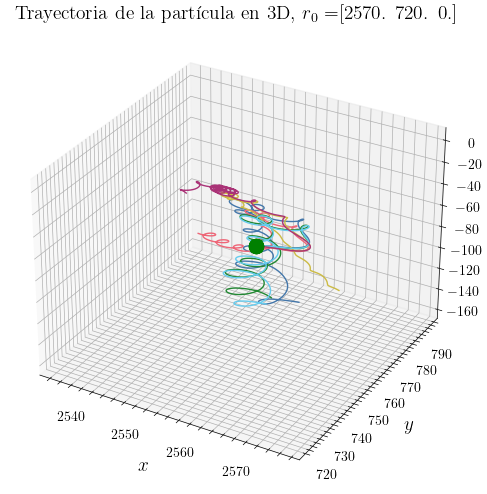

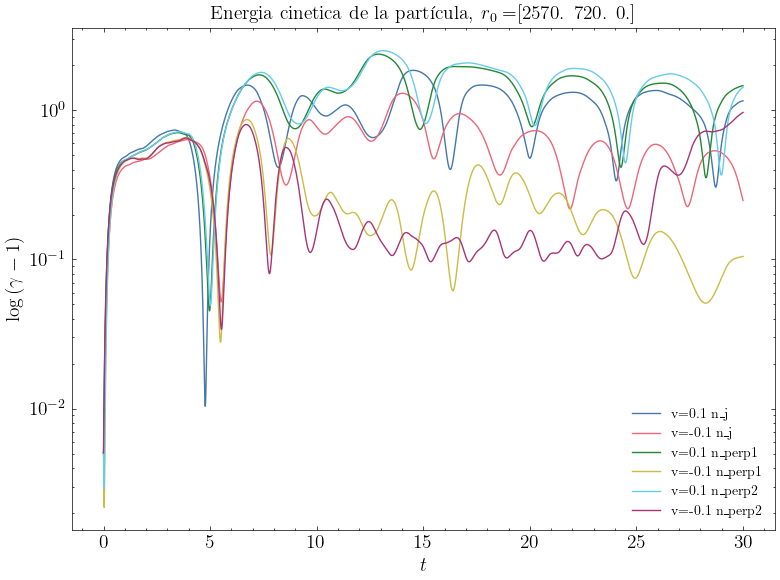

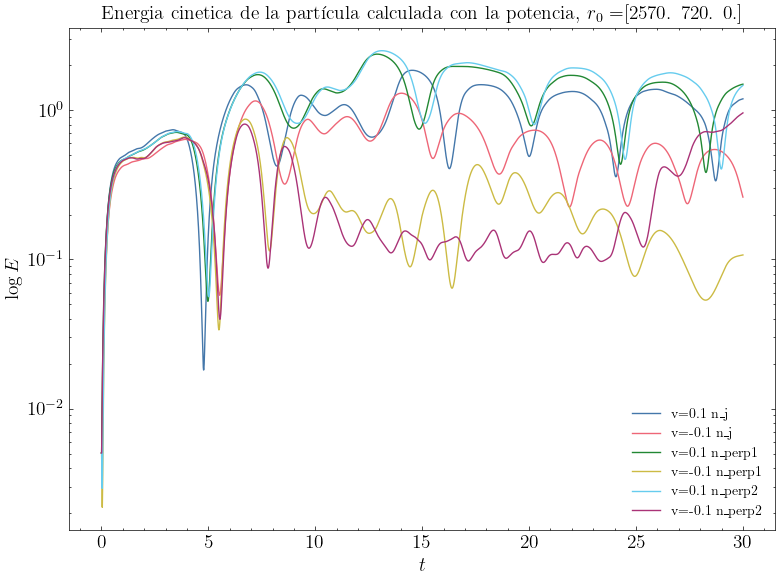

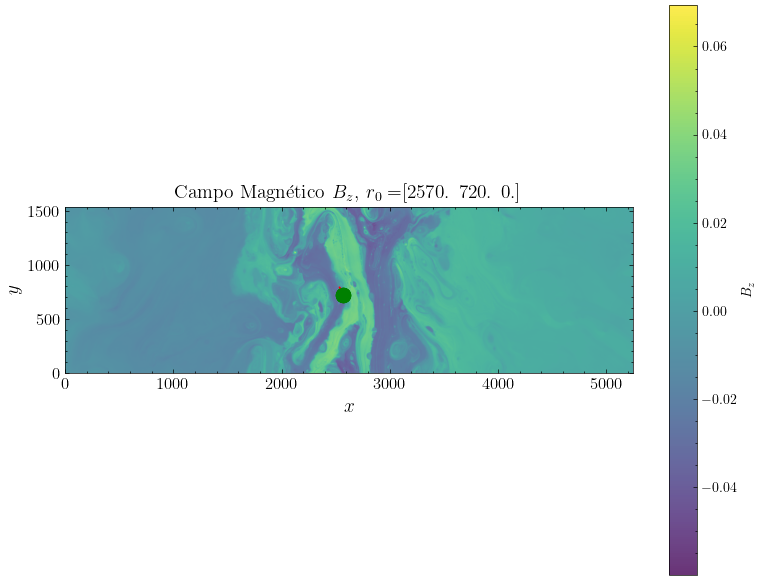

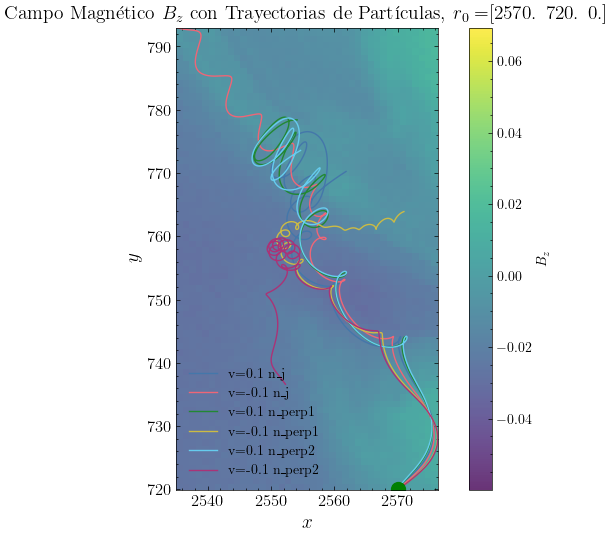

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import scipy as sp

t=np.linspace(0,NT,int(NT*155*1)) # Defino mi Delta t como se obtuvo en en analisis

Np=int(np.size(r0)/3)

# Gráfico 3D de la trayectoria de la partícula
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')
plt.style.use(['science', 'bright'])
for i in range(0,int(Np)):
    ax.plot(r_plot[:, 0, i], r_plot[:, 1, i], r_plot[:, 2, i])

    # Marcar el punto inicial
    ax.scatter(r_plot[0, 0, i], r_plot[0, 1, i], r_plot[0, 2, i], color='g', s=100)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
# plt.legend()
plt.title(r'Trayectoria de la partícula en 3D, $r_0=$'+str(r0[:,0]) , fontsize=14)
plt.show()

# Gráfico 1D de gamma en función del tiempo
#t1=np.linspace(0,NT,len(gamma1))
fig2 = plt.figure(figsize=(8, 6))

plt.semilogy(t, gamma[:,0] - 1,label='v=0.1 n_j')
plt.semilogy(t, gamma[:,1] - 1,label='v=-0.1 n_j')
plt.semilogy(t, gamma[:,2] - 1,label='v=0.1 n_perp1')
plt.semilogy(t, gamma[:,3] - 1,label='v=-0.1 n_perp1')
plt.semilogy(t, gamma[:,4] - 1,label='v=0.1 n_perp2')
plt.semilogy(t, gamma[:,5] - 1,label='v=-0.1 n_perp2')

plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{(\gamma-1)}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la partícula, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.tight_layout()
plt.style.use(['science', 'bright'])
plt.legend()

plt.show()

e_i=np.zeros_like(P) # Array de las energias

for i in range(0,int(Np)):
    for j in range(0,155*30):
        e_i[j,i]=sp.integrate.trapz(P[0:j,i])

fig3 = plt.figure(figsize=(8, 6))

plt.semilogy(t, e_i[:,0]+gamma0[0]-1,label='v=0.1 n_j')
plt.semilogy(t, e_i[:,1]+gamma0[1]-1,label='v=-0.1 n_j')
plt.semilogy(t, e_i[:,2]+gamma0[2]-1,label='v=0.1 n_perp1')
plt.semilogy(t, e_i[:,3]+gamma0[3]-1,label='v=-0.1 n_perp1')
plt.semilogy(t, e_i[:,4]+gamma0[4]-1,label='v=0.1 n_perp2')
plt.semilogy(t, e_i[:,5]+gamma0[5]-1,label='v=-0.1 n_perp2')

plt.xlabel('$t$', fontsize=14)
plt.ylabel('$\log{E }$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Energia cinetica de la partícula calculada con la potencia, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.tight_layout()
plt.style.use(['science', 'bright'])
plt.legend()

plt.show()

# Gráfico 2D de la trayectoria de la partícula con el campo magnético Bz

fig4 = plt.figure(figsize=(8, 6))
for i in range(0,int(Np)):
    plt.plot(r_plot[:, 0, i], r_plot[:, 1, i], 'r', linewidth=1,)

    plt.plot(r_plot[0, 0, i], r_plot[0, 1, i], 'go', markersize=10)

plt.imshow(bz.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis', alpha=0.8)
plt.colorbar(label='$B_z$', orientation='vertical')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Campo Magnético $B_z$, $r_0=$'+str(r0[:,0]), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.tight_layout()
plt.style.use(['science', 'bright'])

plt.show()


# Crear la figura y el conjunto de ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar el campo magnético con imshow y guardar la referencia al objeto mapeable
mappable = ax.imshow(bz.T, origin='lower', extent=[x.min()-10, x.max()+10, y.min()-10, y.max()+10], cmap='viridis', alpha=0.8)

# Crear la barra de color utilizando el objeto mapeable
plt.colorbar(mappable, label='$B_z$', orientation='vertical')

# Dibujar las trayectorias de las partículas

ax.plot(r_plot[:, 0, 0], r_plot[:, 1, 0], linewidth=1, label='v=0.1 n_j')
ax.plot(r_plot[:, 0, 1], r_plot[:, 1, 1], linewidth=1, label='v=-0.1 n_j')
ax.plot(r_plot[:, 0, 2], r_plot[:, 1, 2], linewidth=1, label='v=0.1 n_perp1')
ax.plot(r_plot[:, 0, 3], r_plot[:, 1, 3], linewidth=1, label='v=-0.1 n_perp1')
ax.plot(r_plot[:, 0, 4], r_plot[:, 1, 4], linewidth=1, label='v=0.1 n_perp2')
ax.plot(r_plot[:, 0, 5], r_plot[:, 1, 5], linewidth=1, label='v=-0.1 n_perp2')

ax.plot(r_plot[0, 0, 0], r_plot[0, 1, 0], 'go', markersize=10)


# Etiquetas y título
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_title('Campo Magnético $B_z$ con Trayectorias de Partículas, $r_0=$'+str(r0[:,0]), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajusta los límites de los ejes para concentrarte en las líneas rojas
ax.set_xlim([r_plot[:, 0, :].min(), r_plot[:, 0, :].max()])
ax.set_ylim([r_plot[:, 1, :].min(), r_plot[:, 1, :].max()])

# Ajuste de layout
plt.style.use(['science', 'bright'])
plt.legend()
plt.show()

